<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [488]:
#Импорт необходимых пакетов
import pandas as pd
import psycopg2
import json
import pprint as pp
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from pprint import pprint
from collections import Counter


In [489]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
# настройки подключения в папке data, файл settings.json добавлен в .gitignore
setting = dict()
with open('data/settings.json', 'r') as f:
    setting = json.load(f)

In [547]:
connection = psycopg2.connect(
    dbname=setting["DBNAME"],
    user=setting["USER"],
    host=setting["HOST"],
    password=setting["PASSWORD"],
    port=setting["PORT"]
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [491]:
# текст запроса
query_3_1 = f'''
    SELECT 
        COUNT(id) as unique_vacancies,
        COUNT(distinct name) as unique_name
    FROM vacancies
'''

In [492]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
print('Table query_3_1')
display(df)

# дополнительно выведем часть таблички, 
# чтобы понимать данные которые  анализируем
query = f"""
    SELECT *
    FROM vacancies
    LIMIT 5
"""
df = pd.read_sql_query(query, connection)
print('Table vacancies')
display(df)

Table query_3_1


,unique_vacancies,unique_name
0,49197,21223


Table vacancies


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,None,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,None,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,None,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,None,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,None,1955,1740


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [493]:
# текст запроса
query_3_2 = f'''
    SELECT 
        COUNT(id) as unique_employers,
        COUNT(distinct area) as count_areas --посчитаем дополнительно уникальные районы
    FROM employers
'''

In [494]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
print('Table query_3_2')
display(df)

# дополнительно выведем часть таблички, 
# чтобы понимать данные которые  анализируем
query = f"""
    SELECT *
    FROM employers
    LIMIT 5
"""
df = pd.read_sql_query(query, connection)
print("Table employers")
display(df)

Table query_3_2


,unique_employers,count_areas
0,23501,654


Table employers


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [495]:
# текст запроса
query_3_3 = f'''
    SELECT 
        COUNT('id')
    FROM areas
'''

In [496]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
print("Table query_3_3")
display(df) 

#Выведем часть таблички
query = f"""
    SELECT *
    FROM areas
    LIMIT 5
"""
df = pd.read_sql_query(query, connection)
print("Table areas LIMIT 5")
display(df)

Table query_3_3


,count
0,1362


Table areas LIMIT 5


,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [497]:
# текст запроса
query_3_4 = f'''
    SELECT 
        COUNT('id')
    FROM industries
'''

In [498]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
print("Table query_3_4")
display(df)

#Выведем часть таблички
query = f"""
    SELECT *
    FROM industries
    LIMIT 5
"""
df = pd.read_sql_query(query, connection)
print("Table industries LIMIT 5")
display(df)

Table query_3_4


,count
0,294


Table industries LIMIT 5


,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости


***

# Выводы по предварительному анализу данных
- По таблице вакансий можно обратить внимание, что количество вакансий в 2 раза больше числа уникальных названий профессий. В таком случае невозможно напрямую пользоваться названиями вакансий, а только вычленять слова из названия профессии для дальнейшего анализа, а так же использовать key_skills, для понимания направления деятельности.
- Число вакансий на 2 порядка превышает количество сфер деятельности. Для отдельных вакансий должно точно найтись довольно много вакансий, чтобы проводить статистический анализ (понятно, что если на одну сферу деятельности придется лишь пара вакансий, то анализ будет затруднителен)
- Число работодателей почти так же велико как и число вакансий, но не факт что каждый работодатель размещал вакансии, нужны дополнительные исследования.
- Число регионов, где представлены работодатели (654) почти в 2 раза меньше числа возможных к указанию регионов (1362).  

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [499]:
# текст запроса
query_4_1 = f"""
    SELECT
        a.name,
        COUNT(*) as "количество вакансий"
    FROM vacancies v
    JOIN areas a ON v.area_id = a.id
    GROUP BY a.name
    ORDER BY COUNT(*) DESC
"""

In [500]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
display(df)

,name,количество вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [501]:
# текст запроса
query_4_2 = f"""
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE salary_to is not NULL OR salary_from is not NULL --используем оператор "ИЛИ"
"""

In [502]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
print("Table query_4_2: Число вакансий, где заполненно хотя бы одно из полей с зарплатой.")
display(df)

Table query_4_2: Число вакансий, где заполненно хотя бы одно из полей с зарплатой.


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [503]:
# текст запроса
query_4_3 = f"""
    SELECT
        round(AVG(salary_from)) as avg_salary_from, 
        round(AVG(salary_to)) as avg_salary_to
    FROM vacancies
    WHERE salary_to is not NULL OR salary_from is not NULL
"""

In [504]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
print("Средние значения зарплатной вилки.")
display(df)

Средние значения зарплатной вилки.


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [505]:
# текст запроса
query_4_4 = f"""
    SELECT
        schedule,
        employment,
        COUNT(*) as count
    FROM vacancies
    GROUP BY schedule, employment -- Позволит вывести сочетания графиков и типов трудоустройства
    ORDER BY COUNT(*) DESC
"""

In [506]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
print("Таблица сочетания типов рабочего графика и типа трудоустройства")
display(df)

Таблица сочетания типов рабочего графика и типа трудоустройства


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


In [507]:
#визуализируем данную таблицу
table = df.pivot_table(
    values='count',
    columns='employment',
    index='schedule',
    fill_value=0
)

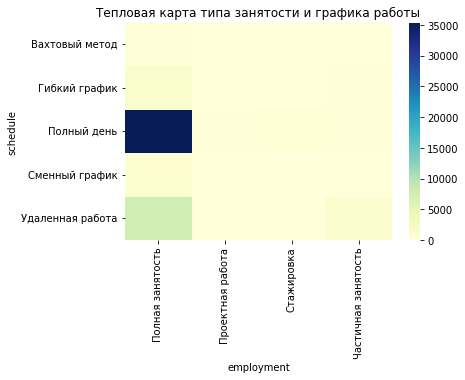

In [508]:
heatmap = sns.heatmap(data = table,cmap='YlGnBu')
heatmap.set_title("Тепловая карта типа занятости и графика работы")
pass

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [509]:
# текст запроса
query_4_5 = f""" 
    SELECT 
        experience,
        COUNT(*)
    FROM vacancies
    GROUP BY experience --сгруппируем по опыту
    ORDER BY COUNT(*)
"""

In [510]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
print("Таблица числа вакансий от опыта работы")
display(df)

# посмотрим влияние опыта на зарплатную вилку
query = f""" 
    SELECT 
        experience,
        round(AVG(salary_from)) as avg_salary_from,
        round(AVG(salary_to)) as avg_salary_to
    FROM vacancies
    GROUP BY experience
    ORDER BY COUNT(*)
"""
df = pd.read_sql_query(query, connection)
print("Таблица зарплатной вилки от опыта работы")
display(df)

Таблица числа вакансий от опыта работы


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Таблица зарплатной вилки от опыта работы


,experience,avg_salary_from,avg_salary_to
0,Более 6 лет,150156.0,197819.0
1,Нет опыта,34699.0,56990.0
2,От 3 до 6 лет,112544.0,171974.0
3,От 1 года до 3 лет,64456.0,97436.0


***

# Выводы по детальному анализу вакансий
- По нашим данным мы видим, что в ТОП-5 городов по числу вакансий находится 3 столицы и 2 города-миллионника, что вполне ожидаемо. Замыкают таблицу рейтинга городов по числу вакансий малоизветсные населенные пункты.
- Лишь в половине вакансий содержатся сведения о зарплате. Вакансии без зарплат навряд ли смогут помочь в прогнозировании заработных плат, так что скорее всего в случае построении модели прогнозирования ЗП, почти половины базы будет не задействована.
- Средние значения зарплатных вилок довольно высокие и выше, чем средние по стране. Это говорит о том, что в базе "слабо" представлен низкооплачиваемый неквалифицированный труд (можно например проверить число вакансий - 'грузчик', вполне вероятно, что их либо нет, либо их очень мало).
- Наиболее популярный тип графика и тип трудоустройства вполне ожидаемо является "полная занятость" - "полный рабочий день", на втором месте "полная занятость" - "удаленная работа" - что может нам подсказать, что база собрана после 2020 года скорее всего, так как удаленная работа набрала популярность во время пандемии (хотя время размещения вакансий нигде не указано). 
- Реже всего работодатели ищут соискателей с опытом работы более 6 лет, скорее всего это очень узкие специалисты в своих областях или управляющие позиции, которые руководят командами, то есть их по определению не может быть много. Далее идут вакансии без опыта, скорее всего это рискованные кандидаты для работодателей, так как их еще нужно дообучать.
- Чаще всего работодатели ищут людей с опытом от 1 года до 3 лет, это можно объяснить благодаря таблице с зарплатными вилками. Это уже кадры с опытом, но еще с не такой высокой заработной платой как у кандидатов с большим опытом.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [511]:
# текст запроса
query_5_1 = f""" 
    (SELECT 
        e.name,
        COUNT(*) 
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY COUNT(*) DESC
    LIMIT 1)
    
    UNION ALL
    
    (SELECT 
        e.name,
        COUNT(*) 
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY COUNT(*) DESC
    OFFSET 4
    LIMIT 1)
"""

In [512]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
print("Table query_5_1")
display(df)

query = f""" 
    (SELECT 
        e.name,
        COUNT(*) 
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY COUNT(*) DESC
    LIMIT 5)
"""
df = pd.read_sql_query(query, connection)
print("Топ-5 компаний по числу вакансий")
display(df)

Table query_5_1


,name,count
0,Яндекс,1933
1,Газпром нефть,331


Топ-5 компаний по числу вакансий


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [513]:
# текст запроса
query_5_2 = f""" 
    SELECT
        a.name as area,
        count(e.id) as cnt_e,
        count(v.id) as cnt_v
    FROM public.areas a
    LEFT JOIN vacancies v ON v.area_id = a.id
    LEFT JOIN employers e ON e.area = a.id
    GROUP BY a.name
    HAVING count(v.id) = 0
    ORDER BY count(e.id) DESC
"""

In [514]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
display(df)
print("Плохой по скорости запрос")

,area,cnt_e,cnt_v
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


Плохой по скорости запрос


In [515]:
query = """ 

    SELECT 
        a.name, 
        coalesce(v.count_vacancies, 0) as cnt_vacancies,
        coalesce(e.count_employers,0) as cnt_employers
    FROM areas a
    LEFT JOIN (SELECT
            area_id,
            COUNT(*) as count_vacancies
        FROM vacancies
        GROUP BY area_id
    ) as v ON a.id = v.area_id
    LEFT JOIN (SELECT
            area,
            COUNT(*) as count_employers
        FROM employers
        GROUP BY area
    ) as e ON e.area = a.id
    -- WHERE a.name LIKE 'Россия'
    GROUP BY a.name, cnt_vacancies, cnt_employers
    HAVING coalesce(v.count_vacancies, 0) = 0 
    ORDER BY coalesce(e.count_employers,0) DESC 
"""
df = pd.read_sql_query(query, connection)
display(df)
print("Этот запрос значительно быстрее, так как JOIN производится по таблицам меньших размеров")

,name,cnt_vacancies,cnt_employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Юрюзань,0,0
589,Ямбург (Ямало-Ненецкий АО),0,0
590,Янино-1,0,0
591,Ясный (Оренбургская область),0,0


Этот запрос значительно быстрее, так как JOIN производится по таблицам меньших размеров


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [516]:
# текст запроса
query_5_3 = f""" 
    SELECT
        e.name,
        COUNT(distinct area_id) as count_area --считаем только уникальные area_id
    FROM vacancies
    JOIN employers e ON employer_id = e.id
    GROUP BY e.name
    ORDER BY COUNT(distinct area_id) DESC
"""

In [517]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
display(df)

,name,count_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [518]:
# текст запроса
query_5_4 = f""" 
    SELECT COUNT(*) 
    FROM employers
    LEFT JOIN employers_industries ON id = employer_id
    WHERE employer_id is NULL
"""

In [519]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
print("Количество работодателей, у которых не указана сфера деятельности")
display(df)

query = f""" 
    SELECT name
    FROM employers
    LEFT JOIN employers_industries ON id = employer_id
    WHERE employer_id is NULL
    LIMIT 10
"""
df = pd.read_sql_query(query, connection)
print("10 компаний без указанной сферы деятельности")
display(df)


Количество работодателей, у которых не указана сфера деятельности


,count
0,8419


10 компаний без указанной сферы деятельности


,name
0,ОМС
1,Luxoft
2,Упаковка
3,ФПК Гарант-Инвест
4,ГК ТСС
5,"ОПУС, группа компаний"
6,Группа компаний АРИКОН
7,ТПС Недвижимость
8,Воздухотехника
9,ЗЕНОН


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [520]:
# текст запроса
query_5_5 = f""" 
    SELECT 
        name
    FROM employers
    JOIN employers_industries ON id = employer_id
    GROUP BY id
    HAVING COUNT(*) = 4
    ORDER BY COUNT(*) DESC, name
    OFFSET 2
    LIMIT 1
"""

In [521]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
print("Table query_5_5")
display(df)

Table query_5_5


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [522]:
# текст запроса
query_5_6 = f""" 
    SELECT COUNT(*)
    FROM employers e
    JOIN employers_industries ei ON e.id = ei.employer_id --необходимо присоединить промежуточную таблицу для объединения employers и industries
    JOIN industries i ON ei.industry_id = i.id
    WHERE i.name LIKE 'Разработка программного обеспечения'
"""

In [523]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
print("Число работодателей со сферой деятельности: Разработка программного обеспечения.")
display(df)

Число работодателей со сферой деятельности: Разработка программного обеспечения.


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [524]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
table = page.find_all('table')[1]

city_list = []
#переберем указанную на сайте табличку
for row in table.find_all('tr'):
    columns = row.find_all('td')
    try:
        city = columns[1].get_text()
        # в тексте могут появляться ссылки, которые при считывании таблицы преобразуются
        # в текст в квадратных скобках [%], оставляем только текст до квадратной скобки
        if '[' in city: 
            new_city =''
            for letter in city:
                if letter == '[':
                    city = new_city
                    break
                new_city +=letter
        city_list.append(city) 
    except:
        pass
#Распечатаем города, убедимся что все в порядке
for city in city_list:
    print(city)

Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Казань
Нижний Новгород
Челябинск
Красноярск
Самара
Уфа
Ростов-на-Дону
Омск
Краснодар
Воронеж
Пермь
Волгоград


In [525]:
# текст запроса
query_5_7 = f""" 
    (SELECT 
        a.name,
        COUNT(*) as count
    FROM vacancies v 
    JOIN employers e ON v.employer_id = e.id
    JOIN areas a ON v.area_id = a.id
    WHERE e.name LIKE 'Яндекс'
    GROUP BY a.name
    HAVING a.name in {tuple(city_list)})
    
    UNION ALL
    -- добавляем строчку TOTAL
    (SELECT
        'Total' as name,
        COUNT(*)
    FROM vacancies v 
    JOIN employers e ON v.employer_id = e.id
    JOIN areas a ON v.area_id = a.id
    WHERE e.name LIKE 'Яндекс' AND a.name in {tuple(city_list)})
    ORDER BY count
"""

In [526]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
display(df)

,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# Выводы по анализу работодателей
- Работодатель может иметь несколько сфер деятельности
- Тенденции по наибольшему числу вакансий для Яндекс сохраняется как и для всех вакансий. Больше всего вакансий в Москве, Санкт-Петербурге и в 5ку входит Новосибирск.
- Яндекс является лидером по числу вакансий в регионах и неоспоримым лидером по числу вакансий для компаний (в 4 раза больше вакансий, чем у второго места)
- По таблице регионов и числу работодателей и вакансий в них, можно обнаружить регионы, которые включают в себя меньшие по размеру субъекты. Причем, нет вакансий с указанием регион Россия, но есть вакансии в городах России. То есть, в таблице регионов, есть избыточная информация.
- Из 23 тысяч работодателей 3,5 тысячи имеют в своей сфере деятельности разработку программного обеспечения, что говорит о популярности данной базы у IT сферы

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [527]:
# текст запроса
query_6_1 = """ 
    SELECT COUNT(*)
    FROM vacancies
    WHERE lower(name) LIKE '%данн%' OR lower(name) LIKE '%data%'
"""

In [528]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
print("Table query_6_1")
display(df)

query_6_1 = """ 
    SELECT *
    FROM vacancies
    WHERE lower(name) LIKE '%данн%' OR lower(name) LIKE '%data%'
    LIMIT 10
"""
df = pd.read_sql_query(query_6_1, connection)
print("Таблица с вакансиями, относящимся к данным")
display(df)

Table query_6_1


,count
0,1771


Таблица с вакансиями, относящимся к данным


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,66075509,Аналитик хранилищ данных и BI-систем/Аналитик ...,SQL\tREST API\tBI-систем/ EAM(ТОиР)\tПроектная...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,43,8645304
1,55462336,Data-analysts (удаленно),SQL\tPython\tPostgreSQL\tDocker\tTableau,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,98,150082
2,55348138,Стажер Data Engineer/Data Аналитик в команду Б...,Python\tSQL\tMS PowerPoint,Полный день,Нет опыта,Стажировка,NaN,NaN,1,3529
3,54629664,Старший специалист хранилищ данных,SQL\tORACLE\tБазы данных\tETL\tБаза данных: Or...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,88,7944
4,55348337,Администратор баз данных и сетей,None,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,246,194646
5,50841715,Администратор баз данных (DBA),PostgreSQL\tMS SQL\tРабота с базами данных\tад...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,96,2488771
6,54824572,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,160,111304
7,55383555,Старший менеджер по анализу данных,Английский язык\tMS PowerPoint\tPower BI\tРабо...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,1753,6041
8,55089826,Администратор баз данных 1С,None,Полный день,От 1 года до 3 лет,Полная занятость,55000.0,70000.0,54,963694
9,54801861,Администратор баз данных (стажер),SQL\tLinux\tРабота с базами данных\tPostgreSQL...,Полный день,Нет опыта,Стажировка,NaN,NaN,26,2733062


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [529]:
# текст запроса
query_6_2 = """ 
    SELECT COUNT(*)
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
            
            AND 
            
            (lower(name) LIKE '%junior%' OR 
             lower(experience) LIKE '%нет опыта%' OR
             lower(employment) LIKE '%стажировка%')
"""

In [530]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
print("Table query_6_2")
display(df)

query = """ 
    SELECT *
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
            
            AND 
            
            (lower(name) LIKE '%junior%' OR 
             lower(experience) LIKE '%нет опыта%' OR
             lower(employment) LIKE '%стажировка%')
    LIMIT 10
"""

df = pd.read_sql_query(query, connection)
print("Примеры вакансий, начинающих дата-сайентистов")
display(df)

Table query_6_2


,count
0,51


Примеры вакансий, начинающих дата-сайентистов


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,4,80190
1,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,70000.0,72,215942
2,55529384,"Математик, Junior/Middle/Senior Data Scientist",Python\tMATLAB\tМатематическое моделирование\t...,Удаленная работа,От 1 года до 3 лет,Частичная занятость,NaN,NaN,1002,1688252
3,55553897,Junior Data Scientist (Стажер),Python\tSQL\tData Mining\tC++\tМатематический ...,Гибкий график,Нет опыта,Стажировка,NaN,37000.0,3,953
4,55343709,Data Scientist/Machine Learning Engineer (Deve...,Machine Learning\tDeep Learning\tData Science\...,Гибкий график,Нет опыта,Частичная занятость,NaN,NaN,2,675403
5,55145641,Junior Data Scientist,Python\tSQL\tMachine Learning\tData Science\tА...,Полный день,Нет опыта,Полная занятость,50000.0,NaN,2,40938
6,55390769,Data Scientist (Computer Vision) - Junior,Python\tML\tPytorch\tComputer Vision,Полный день,Нет опыта,Полная занятость,NaN,NaN,1,1626408
7,54475492,Data Scientist (Junior),Python\tMachine Learning\tPandas\tSQL\tNumpy\t...,Полный день,Нет опыта,Частичная занятость,45000.0,100000.0,1,665449
8,55119989,Intern/Junior Data Scientist,Linux\tPython,Гибкий график,Нет опыта,Стажировка,NaN,NaN,2,3124
9,55120211,Junior Data Scientist (VK),Python\tМатематическая статистика\tАнализ данных,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,15478


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [531]:
# текст запроса
query_6_3 = """ 
    SELECT COUNT(*)
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
            
            AND 
            
            (lower(key_skills) LIKE '%sql%' OR 
             lower(key_skills) LIKE '%postgres%')
"""

In [532]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
print("Table query_6_3")
display(df)

Table query_6_3


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [533]:
# текст запроса
query_6_4 = """ 
    SELECT COUNT(*)
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
            
            AND 
            
            (lower(key_skills) LIKE '%python%')
"""

In [534]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
print("Table query_6_4")
display(df)

Table query_6_4


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [535]:
# текст запроса
query_6_5 = """ 
    SELECT 
        round(AVG(LENGTH(key_skills) + 1 - LENGTH(replace(key_skills, '\t',''))),2)
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
    
"""

In [536]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
print("Table query_6_5")
display(df)

Table query_6_5


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [537]:
# текст запроса
query_6_6 = """
    SELECT 
        experience,
        round(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2))
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
            AND
            (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
"""

In [538]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
print("Table query_6_6")
print("Datascientists salaries")
display(df)

query = """
    SELECT 
        experience,
        round(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2))
    FROM vacancies
    GROUP BY experience
"""

df = pd.read_sql_query(query, connection)
print("Average salaries in database")
display(df)

Table query_6_6
Datascientists salaries


,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Average salaries in database


,experience,round
0,Более 6 лет,166256.0
1,От 3 до 6 лет,133211.0
2,Нет опыта,40472.0
3,От 1 года до 3 лет,76541.0


***

# Выводы по предметному анализу
- Непосредственно с datascience связано 1771 вакансий, чуть меньше 5% от всех вакансий в базе. Можно говорить о популярности направления.
- Для начинающих специалистов есть 51 вакансия, чаще работодателям нужны опытные специалисты.
- В среднем у вакансии около 6 ключевых навыков, но они могут быть сильно взаимосвязаны.
- При выводе таблицы с ключевыми навыками мною было замечено, что различными навыками указывались python, numpy, pandas и т.п. Хотя numpy и pandas являются пакетами python, то есть в базе наблюдается неявное дублирование навыков.
- В качестве ключевых навыков датасайентиста часто указывают python, sql, postgres. 
- Уровень зарплат датасайентистов превосходит средние значения зарплат в базе
- Отсутствие вакансий датасайнтистов с опытом более 6 лет, говорит о недавнем возникновении профессии.

# Дополнительные исследования
1. Выясним ключевые навыки датасайентиста

In [539]:
query = """ 
    SELECT *
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
"""

df = pd.read_sql_query(query, connection)

In [540]:
skills_cnt = Counter()
for skills in df['key_skills']:
    if skills:
        skills_cnt.update(map(lambda x: x.strip().lower(), skills.split('\t')))
        
pprint(skills_cnt.most_common()[:20])

[('python', 348),
 ('sql', 191),
 ('machine learning', 140),
 ('git', 66),
 ('data science', 64),
 ('математическая статистика', 62),
 ('pytorch', 61),
 ('pandas', 55),
 ('data analysis', 54),
 ('ml', 49),
 ('английский язык', 48),
 ('linux', 47),
 ('анализ данных', 46),
 ('tensorflow', 42),
 ('nlp', 42),
 ('big data', 42),
 ('математическое моделирование', 41),
 ('docker', 41),
 ('статистический анализ', 40),
 ('c++', 39)]


### Вывод:
- В ключевых навыках есть разнописания одних и тех же навыков, на это стоит обращать внимание прежде, чем делать выводы (machine learning и ml, например). 
- Можно утверждать, что ключевые технологии-навыки без которых, навряд ли можно быть хорошим datascience специалистом это знание python, sql, git. Скорее без них вообще нельзя стать datascientistом.
- Так же в 20-ку технологий входят: pytorch, linux, tensorflow.
- Английский можно отнести к softskills, так как его уровень влияет на скорость восприятия и изучения новых технологий, документации. 

2. Рассмотрим зависимость уровня специалиста от его опыта работы.

In [541]:
# нужно будет создать столбец с уровнем специалиста
def level_parser(text):
    for word in text.split():
        if word.strip('+()').lower() == 'junior':
            return 'junior'
        if word.strip('+()').lower() == 'middle':
            return 'middle'
        if word.strip('+()').lower() == 'senior':
            return 'senior'
        if word.strip('+()').lower() == 'lead':
            return 'lead'
    return 'other'

df['level'] = df['name'].apply(level_parser)

In [542]:
df.head()

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id,level
0,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,4,80190,junior
1,54824572,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,160,111304,other
2,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,70000.0,72,215942,junior
3,66120847,AI/ML Senior Engineer,Python\tFlask\tLinux\tAWS\tGit,Гибкий график,От 3 до 6 лет,Полная занятость,NaN,NaN,2759,204511,senior
4,55351147,Data Scientist,Python\tSQL\tNLP\tScikit-learn\tMachine Learning,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,53,3127,other


In [543]:
# сгруппируем вакансии по опыту и уровню работы
grouped_df = df.groupby(['experience','level'])['id'].agg(count = 'count')
# создадим сводную таблицу, с числом предложенных вакансий
table = grouped_df.pivot_table(
    values='count', 
    columns='level', 
    index='experience',
    fill_value = 0
)

In [544]:
#избавимся от вакансий с неизвестным уровнем компетенций
table.drop('other', axis=1,inplace=True)
table

level,junior,lead,middle,senior
experience,,,,
Более 6 лет,0,5,0,16
Нет опыта,10,0,0,2
От 1 года до 3 лет,20,3,14,8
От 3 до 6 лет,0,15,12,20


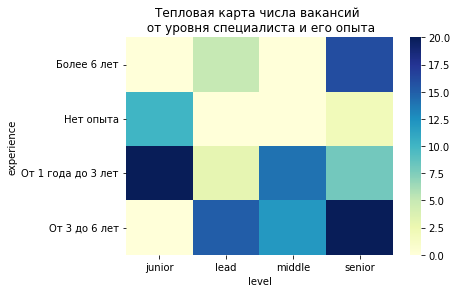

In [546]:
heatmap = sns.heatmap(data = table, cmap='YlGnBu')
heatmap.set_title("Тепловая карта числа вакансий \n от уровня специалиста и его опыта")
pass

Выводы по графику:
- junior-специалисты это специалисты без опыта либо с опытом до 3 лет
- middle-специалисты имеют опыт от 1 до 6 лет
- senior-ы имеют опыт от 3 лет и выше 
- lead-ы от 3 до 6.


# Общий вывод по проекту

Выясним каких вакансий много для DS-специальности по типу занятости и рабочему графику.

In [549]:
query = f"""
    SELECT
        schedule,
        employment,
        COUNT(*) as count
    FROM vacancies
    WHERE   
            (lower(name) LIKE '%data scientist%' OR 
            lower(name) LIKE '%data science%' OR
            lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            lower(name) LIKE '%machine learning%' OR
            lower(name) LIKE '%машинн%обучен%' ) 
    GROUP BY schedule, employment 
    ORDER BY COUNT(*) DESC
"""

df = pd.read_sql_query(query, connection)
display(df)

,schedule,employment,count
0,Полный день,Полная занятость,319
1,Удаленная работа,Полная занятость,110
2,Гибкий график,Полная занятость,37
3,Гибкий график,Частичная занятость,4
4,Удаленная работа,Частичная занятость,3
5,Полный день,Стажировка,2
6,Удаленная работа,Проектная работа,2
7,Гибкий график,Стажировка,2
8,Полный день,Частичная занятость,1


Каково число DS вакансий в разных городах? 

In [552]:
query = f""" 
    SELECT
        a.name as area,
        COUNT(*) as count
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id 
    JOIN areas a ON e.area = a.id
    WHERE   
            (lower(v.name) LIKE '%data scientist%' OR 
            lower(v.name) LIKE '%data science%' OR
            lower(v.name) LIKE '%исследователь данных%' OR
            (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
            lower(v.name) LIKE '%machine learning%' OR
            lower(v.name) LIKE '%машинн%обучен%' ) 
    GROUP BY a.name
    ORDER BY COUNT(*) DESC
"""
df = pd.read_sql_query(query, connection)
display(df)

,area,count
0,Москва,274
1,Санкт-Петербург,49
2,Россия,34
3,Минск,20
4,Новосибирск,11
5,Екатеринбург,11
6,Нижний Новгород,9
7,Казань,9
8,Мальта,9
9,Алматы,7


In [482]:
#Закроем соединение
connection.close()

### Подведем итог исследования


- Большинство вакансий по DS-специальности имеют формат работы подразумевают полную занятость, причем в формате полной занятости наиболее популярна работа в офисе (полный день), затем следует удаленная работы, реже бывает гибкий график. 
- Большинство DS вакансий сосредоточены в городах-миллионниках, абсолютный лидер в этом направлении Москва, но в целом вакансии встречаются и в регионах, а также и за рубежом.
- Главная IT-компания в России это Yandex, имеет наибольшее количество вакансий и представлена в наибольшем числе городов. Высока вероятность начинающему специалисту начать свою карьеру именно там.
- Большая часть вакансий находится в городах-миллиониках.
- Datascientist-ы имеют в зарплату больше средней в базе.
- Ключевые навыки datascientist-ов это python, sql, git, ml, математическая статистика. Так же необходим английский язык


### Возможные дополнительные исследования:
- Возможно мы потеряли часть информации отбросив категорию 'others'. Есть предположение, что опытность соискателей из others можно было найти воспользовавшись столбцом key_skills. Посмотреть key_skills у вакансий в которых явно указан уровень и на основании этого дозаполнить уровень тех, у кого он не заполнен.
- Можно выяснить какие навыки наиболее существенно влияют на уровень заработной платы.